**사이킷런으로 수행하는 타이타닉 생존자 예측**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

titanic_df = pd.read_csv(train_url)
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
print('\n학습데이터 정보\n')
print(titanic_df.info())


학습데이터 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
#Null값 처리
import warnings
warnings.filterwarnings('ignore')

titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값의 개수: ', titanic_df.isna().sum().sum())

데이터 세트 Null 값의 개수:  0


In [ ]:
print(' ## Sex 값 분포 ## \n', titanic_df['Sex'].value_counts())
print('\n ## Cabin 값 분포 ## \n', titanic_df['Cabin'].value_counts())
print('\n ## Embarked 값 분포 ## \n', titanic_df['Embarked'].value_counts())

 ## Sex 값 분포 ## 
 Sex
male      577
female    314
Name: count, dtype: int64

 ## Cabin 값 분포 ## 
 Cabin
N              687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
A24              1
C50              1
B42              1
C148             1
Name: count, Length: 148, dtype: int64

 ## Embarked 값 분포 ## 
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [ ]:
#Cabin의 속성값 이름에서 앞문자만 추출
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [ ]:
#설별에 따른 생존자 수 비교
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

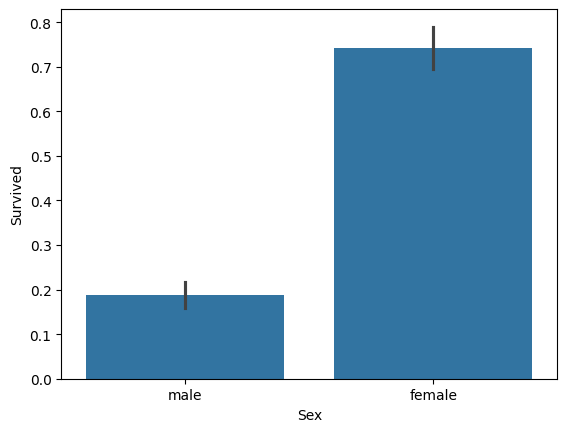

In [ ]:
#성별에 따른 생존자를 시본 그래프로 확인
#시본은 맷플롯립 기반, 세련된 비주얼, 판다스와 연동
#X축에 Sex 칼럼, Y축에 생존자 칼럼, 데이터는 가져올 DataFrame 객체명을 입력 후 barplot()함수 호출

sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

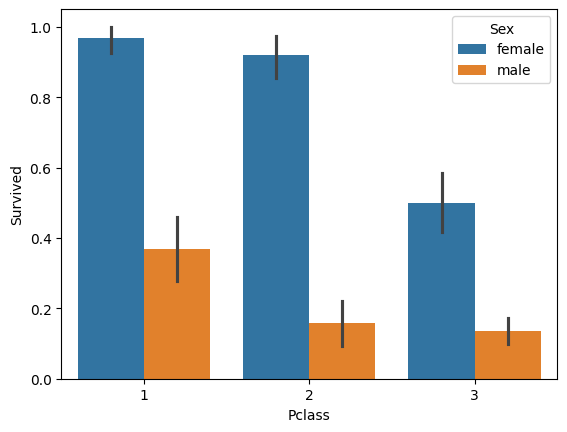

In [ ]:
#성별을 고려한 부자와 가난한 사람들의 생존 확률(객실 등급)
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic_df)

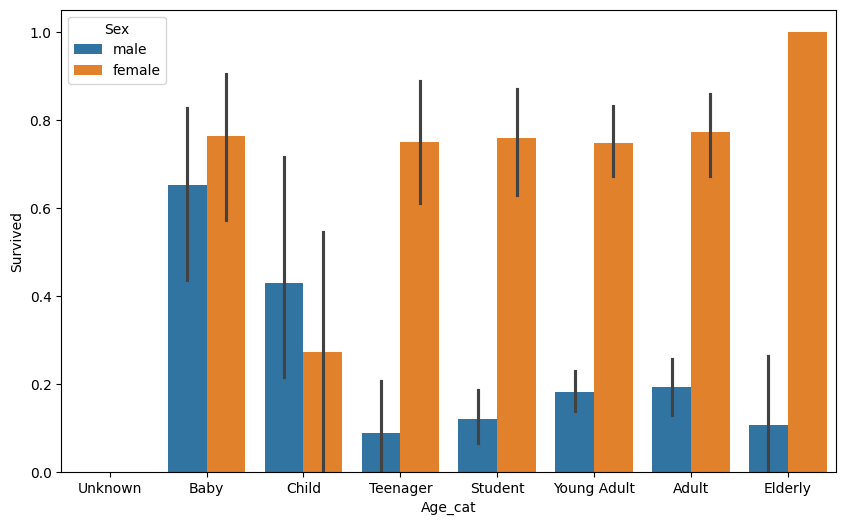

In [ ]:
#나이에 따른 생존 확률

#1 categorization
def get_category(age):
  if age  <= -1: cat = 'Unknown' ##오류값 처리
  elif age <=5: cat = 'Baby'
  elif age <= 12: cat = 'Child'
  elif age <= 18: cat = 'Teenager'
  elif age <= 25: cat = 'Student'
  elif age <=35: cat = 'Young Adult'
  elif age <=60: cat = 'Adult'
  else: cat = 'Elderly'

  return cat

#2 그래프 설정
#막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize = (10, 6))

#시본그래프의 X축의 값 순차적 표시
#data로 가져올 X축 값과 같아야 함
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

#3. 나이 유형 칼럼을 DataFrame의 apply lambda 식으로 추가

#람다 식에서 위에 생성한 함수를 반환값으로 설정
#get_category(X)로 Age를 받아서 해당 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))

#4. 그래프 그리기
## order = group_names
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data =titanic_df, order=group_names)

#5. Age_cat은 임시적으로 만든 칼럼이므로 삭제
titanic_df.drop('Age_cat', axis = 1, inplace = True)

In [ ]:
#문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
#LabelEncoder class, fit(), transform()으로 변환

from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])
  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [ ]:
#데이터 전처리 함수 총정리
#Null처리
def fillna(titanic_df):
  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
  titanic_df['Cabin'].fillna('N', inplace=True)
  titanic_df['Embarked'].fillna('N', inplace=True)
  titanic_df['Fare'].fillna(0, inplace = True)
  return titanic_df

#머신러닝 알고리즘에 불필요한 단순 식별자 수준의 피처인 PassengerId Name Ticket 피처 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name','Ticket'], axis=1, inplace=True)
  return df

#레이블 인코딩
def format_features(df):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

In [ ]:
#원본 데이터 재로딩 피처 데이터 세트, 레이블 데이터 세트 추출
train_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

titanic_df = pd.read_csv(train_url)

y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)

X_titanic_df = transform_features(X_titanic_df)

In [ ]:
#트레인, 테스트 데이터 세트 추출
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver = 'liblinear')

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print("DecisionTreeClassifier 정확도: {0:.4f}".format(accuracy_score(y_test, dt_pred)))

#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("RandomForestClassifier 정확도: {0:.4f}".format(accuracy_score(y_test, rf_pred)))

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print("LogisticRegression 정확도: {0:.4f}".format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7989
RandomForestClassifier 정확도: 0.8436
LogisticRegression 정확도: 0.8547


* KFold의 .split() 메서드는 generator를 반환  
:이 generator는 매 반복마다 **(train_index, test_index)** 라는 튜플을 내보냄.

* iterable (이터러블)  
: for문에 쓸 수 있는 모든 객체.
내부적으로 __iter__() 메서드를 가지고 있어야 함.
예: list, tuple, dict, set, str, range, enumerate, zip 등.

* iterator (이터레이터)  
:한 번씩 “다음 값”을 꺼낼 수 있음.
예: enumerate 객체, zip 객체, map 객체, filter 객체, iter(list)로 만든 것 등.

In [30]:
from sklearn.model_selection import KFold

def exec_kfold(dt_clf, folds = 5):
  #폴드 세트를 5개인 KFold 객체 생성, 폴드 수만큼 에측 결과 저장을 위한 리스트 객체 생성
  kfold = KFold(n_splits = folds)
  scores = []

  #교차검증 수행
  for count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    scores.append(accuracy)
    #kold.split()는 (학습 데이터에 해당하는 인덱스 배열, 시험 데이터에 해당하는 인덱스 배열)을 반환
    #enumerate()는 enumerate 객체를 반환
    #enumerate()를 list(), tuple(), for 문등으로 감싸면 enumerator 순회하며 (인데스, 값)을 반환
    print("교차 검증 {0} 정확도: {1:.4f}".format(count, accuracy))

  mean_score = np.mean(scores)
  print("평균 정확도: {0:.4f}".format(mean_score))
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7486
교차 검증 1 정확도: 0.7640
교차 검증 2 정확도: 0.8202
교차 검증 3 정확도: 0.7809
교차 검증 4 정확도: 0.7921
평균 정확도: 0.7812


In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for count, accuracy in enumerate(scores):
  print("교차 검증 {0} 정확도 {1:.4f}".format(count, accuracy))
print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도 0.7486
교차 검증 1 정확도 0.7753
교차 검증 2 정확도 0.8090
교차 검증 3 정확도 0.7584
교차 검증 4 정확도 0.8034
평균 정확도: 0.7789


In [32]:
#최적 하이퍼 파라미터

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring = 'accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)

print("최적 하이퍼 파라미터: ", grid_dclf.best_params_)
print("최고 정확도: ", grid_dclf.best_score_)
best_dclf = grid_dclf.best_estimator_

#최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredicton = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredicton)
print("테스트 세트에서의 DecisionTreeClassifier 정확도 {0:.4f}".format(accuracy))

최적 하이퍼 파라미터:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
최고 정확도:  0.7992810006894514
테스트 세트에서의 DecisionTreeClassifier 정확도 0.8659


# **피마 인디언 당뇨병 예측**


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 피마 인디언 당뇨병 데이터셋 URL
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"

# CSV 불러오기
diabetes_df = pd.read_csv(url)

print(diabetes_df['Outcome'].value_counts())
print(diabetes_df.head())


Outcome
0    500
1    268
Name: count, dtype: int64
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [34]:
##feature 타입과 Null 값 개수 확인
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


→ Null 값 없음, 피처 타입은 모두 숫자형, 별도의 피처 인코딩 필요 없음

In [36]:
def get_clf_eval(y_test, pred, pred_proba=None):
    # 혼동 행렬
    confusion = confusion_matrix(y_test, pred)
    # 기본 지표
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    # ROC-AUC (pred_proba 있을 때만)
    roc_auc = roc_auc_score(y_test, pred_proba) if pred_proba is not None else None

    print("오차 행렬")
    print(confusion)

    if roc_auc is not None:
        print("정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, "
              "F1: {3:.4f}, AUC: {4:.4f}".format(accuracy, precision, recall, f1, roc_auc))
    else:
        print("정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, "
              "F1: {3:.4f}".format(accuracy, precision, recall, f1))

In [37]:
#로지스틱 회귀를 이용하여 예측 모델 생성
#데이터 추출, 맨 끝이 outcome 칼럼으로 레이블 값임.
x = diabetes_df.iloc[:, :-1]
y = diabetes_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=156, stratify=y)

#학습, 예측, 평가
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926, F1: 0.6465, AUC: 0.8083


In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    plt.figure(figsize=(8, 6))

    # threshold 배열 길이만큼 자르기 (precisions, recalls은 len(thresholds)+1)
    threshold_boundary = thresholds.shape[0]

    # Precision은 점선으로 표시
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='Precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='Recall')

    # threshold 값 X축 눈금을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    # 라벨, 범례, 그리드 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

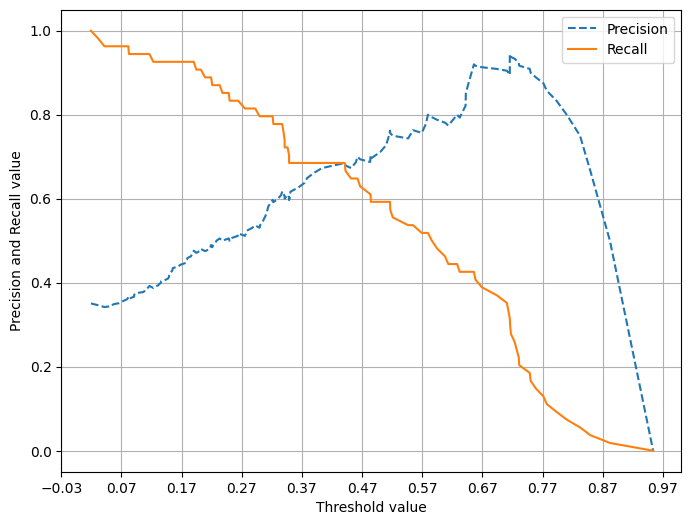

In [41]:
#정밀도 재현율 곡선을 보고 임곗값별 정밀도와 재현율 값의 변화 확인
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [42]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


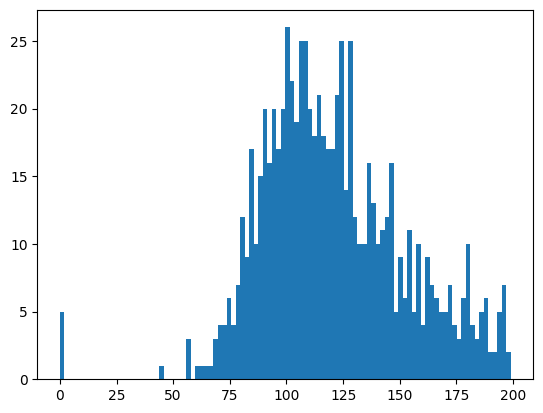

In [43]:
#글루코스 피처의 히스토그램에서 0값이 일정 수준 존재한다는 것을 알 수 있음

plt.hist(diabetes_df['Glucose'], bins=100)
plt.show()

In [44]:
#min() = 0 피처에 대해 0 값의 건수 및 전체 데이터 건수 대비 몇 퍼센트의 비율로 존재하는지?
#0값 검사할 피처명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

#전체 데이터 건수
total_count = diabetes_df['Glucose'].count()

#피처별 퍼센트 계산
for feature in zero_features:
  zero_count = diabetes_df[diabetes_df[feature] == 0][feature].count()
  print("{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %".format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


In [45]:
#0 값을 평균 값으로 대체
mean_zero_features = diabetes_df[zero_features].mean()
diabetes_df[zero_features]=diabetes_df[zero_features].replace(0, mean_zero_features)

In [46]:
X = diabetes_df.iloc[:, :-1]   # 마지막 컬럼 'Outcome' 제외
y = diabetes_df.iloc[:, -1]    # 마지막 컬럼 'Outcome'

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=156, stratify=y
)

#로지스틱 회귀 학습/예측

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

#평가
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC: 0.8433


In [47]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print(f"\n임곗값: {custom_threshold}")
        get_clf_eval(y_test, custom_predict)

In [49]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)


임곗값: 0.3
오차 행렬
[[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963, F1: 0.6615

임곗값: 0.33
오차 행렬
[[72 28]
 [12 42]]
정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778, F1: 0.6774

임곗값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222, F1: 0.6667

임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037, F1: 0.6667

임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667, F1: 0.6792

임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667, F1: 0.6857

임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931

임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804


In [50]:
#임계값 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

#위에서 구한 lr_clf의 predict_proba()예측 확률 array에서 1에해당하는 Binarizer 변환
pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])

오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC: 0.8433
